# Import Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv("gojek.csv", low_memory=False)
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,5ffe9bc0-9eb4-4dc8-aa6f-30a5eccf2c5e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,biar bintang yg berbicara,5,0,5.17.1,2025-04-27 11:47:40,NaN,NaN,5.17.1
1,996463a4-89e8-4232-8b1d-9580a2a437a4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tidak jelas aplikasi dlm pemberian fasilitas p...,1,0,NaN,2025-04-27 11:43:49,"Hai Kak Gervin, mohon maaf atas ketidaknyamana...",2025-04-27 12:05:32,NaN
2,bb074689-6945-44a3-9bca-f57da8aa3689,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Pelayanan yang baik,5,0,5.18.2,2025-04-27 11:43:38,NaN,NaN,5.18.2
3,1c0c537a-0200-488b-8d72-2e1b0907f23d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,minta limit yang bnyak kak,5,0,4.92.1,2025-04-27 11:33:16,NaN,NaN,4.92.1
4,a6187427-f772-419e-8315-52d742c0ec14,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,terimaksih gojek,5,0,5.17.1,2025-04-27 11:26:25,NaN,NaN,5.17.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650458 entries, 0 to 1650457
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   reviewId              1650458 non-null  object
 1   userName              1650458 non-null  object
 2   userImage             1650458 non-null  object
 3   content               1650250 non-null  object
 4   score                 1650458 non-null  int64 
 5   thumbsUpCount         1650458 non-null  int64 
 6   reviewCreatedVersion  1247849 non-null  object
 7   at                    1650458 non-null  object
 8   replyContent          171009 non-null   object
 9   repliedAt             171009 non-null   object
 10  appVersion            1247849 non-null  object
dtypes: int64(2), object(9)
memory usage: 138.5+ MB


In [4]:
df.isna().sum()

reviewId                      0
userName                      0
userImage                     0
content                     208
score                         0
thumbsUpCount                 0
reviewCreatedVersion     402609
at                            0
replyContent            1479449
repliedAt               1479449
appVersion               402609
dtype: int64

In [5]:
df['score'].unique()

array([5, 1, 4, 3, 2, 0], dtype=int64)

In [6]:
df.duplicated().sum()

0

# Data Cleaning

In [7]:
df = df[['content', 'score', 'thumbsUpCount', 'at']]
df['at'] = pd.to_datetime(df['at'])
df['month'] = df['at'].dt.to_period('M')
df.head()

,content,score,thumbsUpCount,at,month
0,biar bintang yg berbicara,5,0,2025-04-27 11:47:40,2025-04
1,tidak jelas aplikasi dlm pemberian fasilitas p...,1,0,2025-04-27 11:43:49,2025-04
2,Pelayanan yang baik,5,0,2025-04-27 11:43:38,2025-04
3,minta limit yang bnyak kak,5,0,2025-04-27 11:33:16,2025-04
4,terimaksih gojek,5,0,2025-04-27 11:26:25,2025-04


In [8]:
df1 = df[:20000]

In [9]:
# Inisialisasi stemmer dan stopword remover dari Sastrawi
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

stopword_factory = StopWordRemoverFactory()
stopword_remover = stopword_factory.create_stop_word_remover()

# Daftar stopwords kustom
custom_stopwords = ['nya', 'aplikasi', 'yg', 'yang', 'gak', 'driver']

# Fungsi untuk stemming dan stopword removal
def process_text(text):
    # Hapus stopwords bawaan Sastrawi
    text_no_stopwords = stopword_remover.remove(text)
    
    # Hapus stopwords kustom
    words = text_no_stopwords.split()
    filtered_words = [word for word in words if word.lower() not in custom_stopwords]
    text_no_custom_stopwords = ' '.join(filtered_words)
    
    # Lakukan stemming
    stemmed_text = stemmer.stem(text_no_custom_stopwords)
    return stemmed_text

# Terapkan proses pada kolom 'content'
df1['content_processed'] = df1['content'].apply(process_text)

C:\Users\BUDI\AppData\Local\Temp\ipykernel_27196\1026337563.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['content_processed'] = df1['content'].apply(process_text)


In [10]:
df1.head()

,content,score,thumbsUpCount,at,month,content_processed
0,biar bintang yg berbicara,5,0,2025-04-27 11:47:40,2025-04,biar bintang bicara
1,tidak jelas aplikasi dlm pemberian fasilitas p...,1,0,2025-04-27 11:43:49,2025-04,jelas dlm beri fasilitas pinjam
2,Pelayanan yang baik,5,0,2025-04-27 11:43:38,2025-04,layan baik
3,minta limit yang bnyak kak,5,0,2025-04-27 11:33:16,2025-04,minta limit bnyak kak
4,terimaksih gojek,5,0,2025-04-27 11:26:25,2025-04,terimaksih gojek


# EDA

C:\Users\BUDI\AppData\Local\Temp\ipykernel_23796\499588667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='score', data=df, palette='Set2')


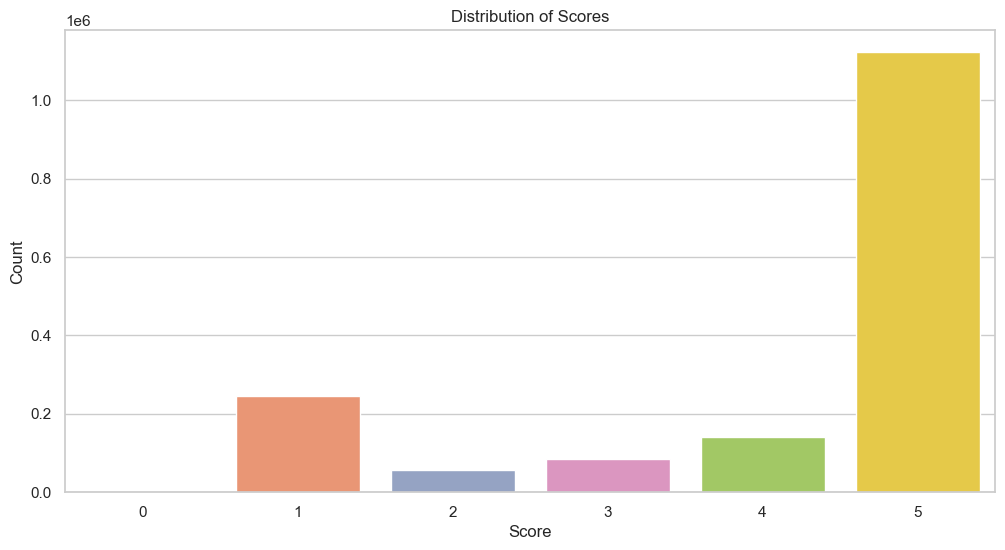

In [5]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x='score', data=df, palette='Set2')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [12]:
# Comment dengan thumbsUpCount terbanyak
df['content'].iloc[df['thumbsUpCount'].idxmax()]

'Kasih ☆2 dulu deh. Bugnya parah, berapa kali ketemu tulisan "server sedang padat merayap" tapi ternyata transaksi berhasil, ketika dipencet "coba lagi" malah membuat transaksi baru, dan transaksi yg on going masih dalam proses, ujung2nya malah jadi double order. Mohon dicek bug yang ini karena sangat merugikan. Trims.'

In [13]:
# jumlah comment per bulan
monthly_comment = df['month'].groupby(df['month']).count()
monthly_comment



month
2015-01      19
2015-02      85
2015-03      51
2015-04      88
2015-05     158
           ... 
2024-12    6724
2025-01    5379
2025-02    4916
2025-03    5371
2025-04    5911
Freq: M, Name: month, Length: 124, dtype: int64

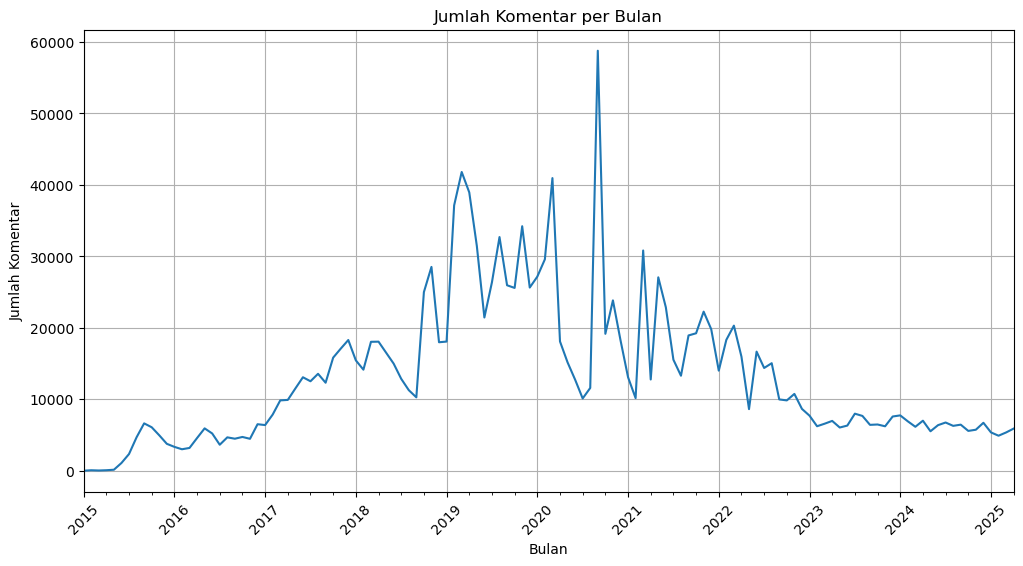

In [14]:
#line chart jumlah comment per bulan
plt.figure(figsize=(12, 6))
monthly_comment.plot(kind='line')
plt.title('Jumlah Komentar per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Komentar')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Puncak tertinggi terjadi sekitar 2019 sampai 2020, dengan jumlah komentar mencapai hampir 60,000 per bulan. Ini bisa mencerminkan periode aktivitas pengguna yang sangat tinggi, mungkin karena promosi besar, peningkatan penggunaan layanan selama pandemi COVID-19 (misalnya, lebih banyak orang menggunakan layanan pengiriman), atau peluncuran fitur baru yang memicu banyak diskusi.

# Sentimen Analysis

In [15]:
# Distribusi score
score_distribution = df1.groupby('score').size()
print("Distribusi Score:\n", score_distribution)

# Kata-kata yang sering muncul untuk setiap score
from collections import Counter
for score in df1['score'].unique():
    words = ' '.join(df1[df1['score'] == score]['content_processed']).split()
    word_freq = Counter(words).most_common(10)
    print(f"\nKata yang sering muncul untuk score {score}:")
    print(word_freq)

Distribusi Score:
 score
1     5170
2      719
3      712
4     1013
5    12386
dtype: int64

Kata yang sering muncul untuk score 5:
[('sangat', 1926), ('bantu', 1690), ('bagus', 1222), ('mantap', 1219), ('gojek', 1190), ('baik', 813), ('good', 709), ('cepat', 665), ('mudah', 608), ('ok', 473)]

Kata yang sering muncul untuk score 1:
[('ga', 1360), ('gojek', 1334), ('lama', 970), ('jam', 854), ('mau', 852), ('pesan', 797), ('udah', 768), ('makan', 728), ('nunggu', 705), ('aja', 685)]

Kata yang sering muncul untuk score 4:
[('bagus', 136), ('bantu', 112), ('gojek', 106), ('sangat', 104), ('baik', 96), ('lama', 75), ('ga', 71), ('lebih', 59), ('kadang', 58), ('order', 55)]

Kata yang sering muncul untuk score 3:
[('gojek', 191), ('ga', 158), ('lama', 122), ('mau', 110), ('jadi', 106), ('pesan', 100), ('makan', 89), ('lebih', 88), ('gofood', 87), ('udah', 87)]

Kata yang sering muncul untuk score 2:
[('gojek', 171), ('lama', 166), ('ga', 149), ('mau', 140), ('pesan', 125), ('udah', 115),

## Insight:
Kepuasan Pengguna (Skor 5 dan 4)
- Mayoritas ulasan masih memberikan skor 5, menunjukkan
tingkat kepuasan pengguna yang sangat tinggi secara keseluruhan.
- Skor 4 juga menunjukkan kepuasan dengan sedikit kritik ringan, mirip dengan dataset sebelumnya.
- Kata "cepat" dan "mudah" menunjukkan bahwa kecepatan dan kemudahan layanan menjadi nilai tambah yang signifikan.
- rekomendasi:
Pertahankan kecepatan dan kemudahan layanan, karena ini menjadi alasan utama kepuasan.
Promosikan fitur-fitur yang dianggap "membantu" untuk mempertahankan loyalitas pengguna.

Ketidakpuasan Pengguna (Skor 1 dan 2)
- Skor 1 menunjukkan keluhan utama terkait keterlambatan ("lama"), proses pemesanan ("pesan").
- Skor 2 juga mengeluhkan keterlambatan ("lama"), masalah pemesanan ("pesan" 8 kali).
- Rekomendasi:
Prioritaskan peningkatan kecepatan layanan, terutama untuk pengiriman atau respons (misalnya, optimasi rute driver atau sistem antrian).
Perbaiki sistem pemesanan (GoFood, GoRide, dll.) untuk mengurangi masalah seperti keterlambatan atau pesanan yang tidak terproses ("pesan").

Pengguna Netral (Skor 3)
- Skor 3 menunjukkan campuran pujian dan kritik, dengan fokus pada keterlambatan ("lama") dan pengalaman pemesanan makanan ("makan").
- Tingkatkan layanan GoFood dengan mempercepat pengiriman makanan, karena "makan" dan "lama" sering muncul.

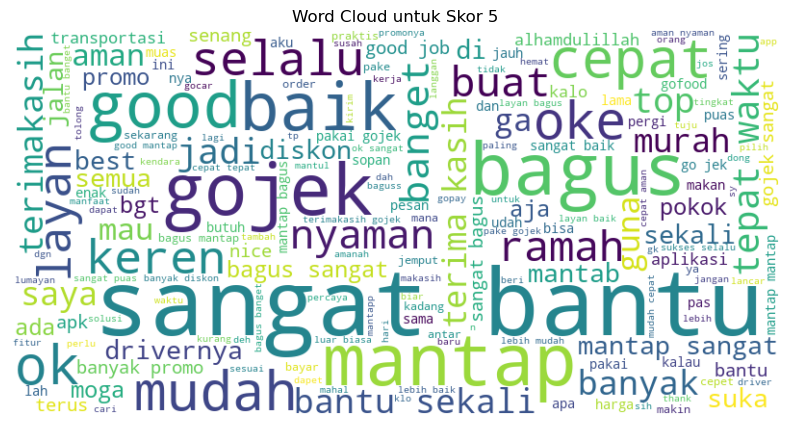

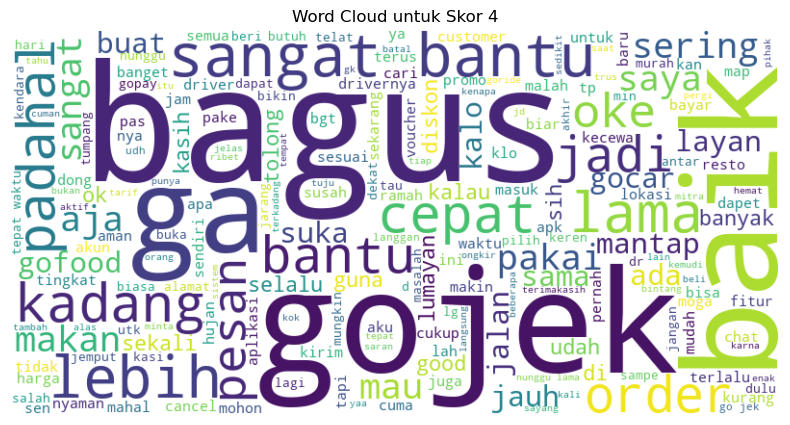

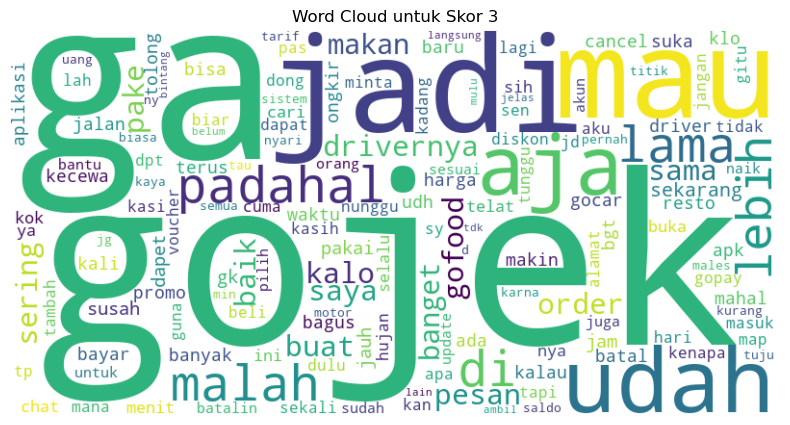

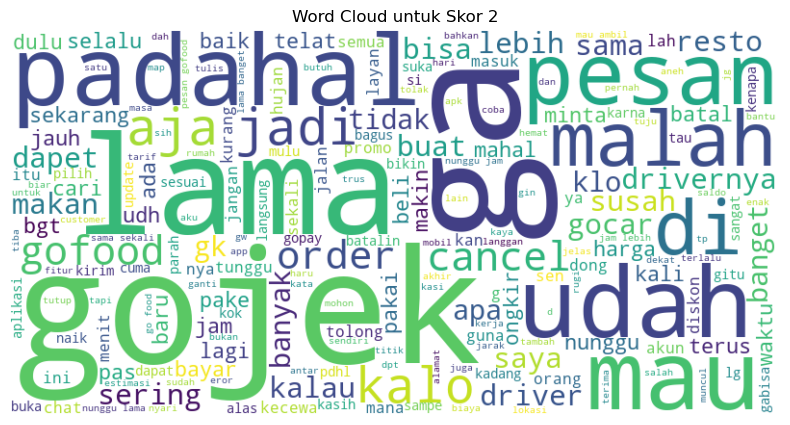

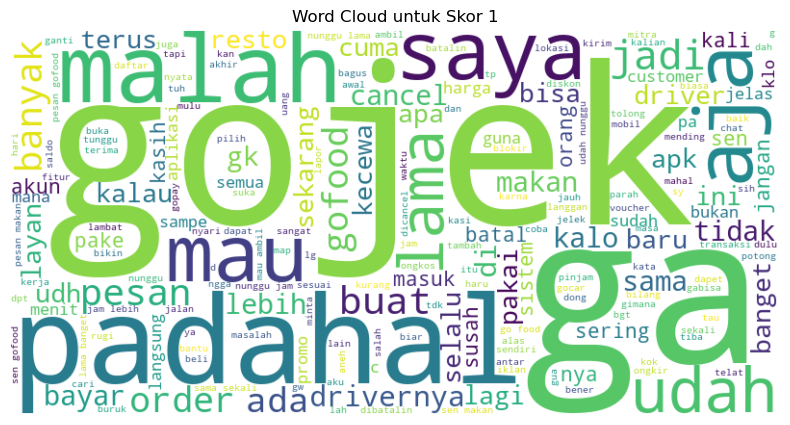

In [16]:
for score in range(5, 0, -1):
    # Ambil teks dari 'content_processed' untuk skor tertentu
    text = ' '.join(df1[df1['score'] == score]['content_processed'].dropna())
    
    # Buat word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                         min_font_size=10).generate(text)
    
    # Tampilkan word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud untuk Skor {score}')
    plt.show()

In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import joblib

#Buat label sentimen
def label_sentiment(score):
    if score >= 4:
        return 'positif'
    elif score == 3:
        return 'netral'
    else:
        return 'negatif'

df1['sentiment'] = df1['score'].apply(label_sentiment)

#Ekstraksi fitur dengan TF-IDF
vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1, 2))  # Unigram dan bigram
X = vectorizer.fit_transform(df1['content_processed'])
y = df1['sentiment']

# Seimbangkan data dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Optimasi model SVM dengan Grid Search
param_grid = {
    'C': [0.1, 1, 10],  # Parameter regularisasi
    'kernel': ['linear', 'rbf'],  # Jenis kernel
    'class_weight': ['balanced', None]  # Penanganan data tidak seimbang
}

model = SVC(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Parameter Terbaik:", grid_search.best_params_)
print("Skor Terbaik (F1 Macro):", grid_search.best_score_)

# Evaluasi model terbaik pada data uji
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nLaporan Klasifikasi untuk Model Teroptimasi:")
print(classification_report(y_test, y_pred))

# Simpan model dan vectorizer
joblib.dump(best_model, 'optimized_sentiment_model.pkl')
joblib.dump(vectorizer, 'optimized_tfidf_vectorizer.pkl')

# Uji prediksi pada ulasan baru
def predict_sentiment(new_review):
    new_review_tfidf = vectorizer.transform([new_review])
    prediction = best_model.predict(new_review_tfidf)[0]
    return prediction


C:\Users\BUDI\AppData\Local\Temp\ipykernel_27196\3243592652.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

d:\master program\anaconda\Lib\site-packages\sklearn\base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.



Parameter Terbaik: {'C': 10, 'class_weight': 'balanced', 'kernel': 'rbf'}
Skor Terbaik (F1 Macro): 0.904489010918659

Laporan Klasifikasi untuk Model Teroptimasi:
              precision    recall  f1-score   support

     negatif       0.93      0.84      0.88      2640
      netral       0.92      0.94      0.93      2746
     positif       0.87      0.93      0.90      2654

    accuracy                           0.91      8040
   macro avg       0.91      0.90      0.90      8040
weighted avg       0.91      0.91      0.90      8040



In [18]:
new_reviews = ["layanan sangat lambat", "gojek sangat membantu", "cukup baik tapi kadang lama"]
for review in new_reviews:
    sentiment = predict_sentiment(review)
    print(f"Ulasan: '{review}' -> Sentimen: {sentiment}")

Ulasan: 'layanan sangat lambat' -> Sentimen: negatif
Ulasan: 'gojek sangat membantu' -> Sentimen: positif
Ulasan: 'cukup baik tapi kadang lama' -> Sentimen: netral
